# Import Lybraries

In [800]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, date, time
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, KFold
from sklearn.metrics import r2_score,mean_squared_error,make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier

# Lodd data and Display data

In [38]:
# Load the data from the URL
url = 'https://raw.githubusercontent.com/bbwieland/ncaa-projections/main/data/KenPomGamesCleaned.csv'
df = pd.read_csv(url)

# Display the first 10 rows of the DataFrame
df.head(10)

team_rk     team  opponent_rk           opponent     result  poss  ot  \
0        7  Houston          219  Northern Colorado   W, 83-36    64   0   
1        6  Houston          210     Saint Joseph's   W, 81-55    69   0   
2        4  Houston           59       Oral Roberts   W, 83-45    67   0   
3        4  Houston          307     Texas Southern   W, 83-48    66   0   
4        3  Houston           47             Oregon   W, 66-56    60   0   
5        2  Houston           75           Kent St.   W, 49-44    70   0   
6        2  Houston          179        Norfolk St.  W, 100-52    64   0   
7        1  Houston            8       Saint Mary's   W, 53-48    56   0   
8        1  Houston          226      North Florida   W, 76-42    61   0   
9        1  Houston            3            Alabama   L, 71-65    72   0   

   pre_wp   location  w  ...  w_conference_proj  l_conference_proj  \
0     NaN       Home  1  ...                  0                  0   
1     NaN    Neutral  2  ...                  0                  0   
2     NaN       Home  3  ...                  0                  0   
3     NaN       Home  4  ...                  0                  0   
4     NaN       Away  5  ...                  0                  0   
5     NaN       Home  6  ...                  0                  0   
6     NaN       Home  7  ...                  0                  0   
7     NaN  Semi-Home  8  ...                  0                  0   
8     NaN       Home  9  ...                  0                  0   
9     NaN       Home  9  ...                  0                  0   

         date  game_id tiers_of_joy  win_loss team_score  opp_score  team_ppp  \
0  2022-11-07       87          NaN         1         83         36  1.296875   
1  2022-11-11      299          NaN         1         81         55  1.173913   
2  2022-11-14      496            B         1         83         45  1.238806   
3  2022-11-16      615          NaN         1         83         48  1.257576   
4  2022-11-20      832            A         1         66         56  1.100000   
5  2022-11-26     1114          NaN         1         49         44  0.700000   
6  2022-11-29     1212          NaN         1        100         52  1.562500   
7  2022-12-03     1464            A         1         53         48  0.946429   
8  2022-12-06     1548          NaN         1         76         42  1.245902   
9  2022-12-10     1691            A         0         65         71  0.902778   

    opp_ppp  
0  0.562500  
1  0.797101  
2  0.671642  
3  0.727273  
4  0.933333  
5  0.628571  
6  0.812500  
7  0.857143  
8  0.688525  
9  0.986111  

[10 rows x 30 columns]

## Dataset Columns Explanation

- **`team_rk`**: Rank of the team in the dataset or league standings.
- **`team`**: Name or identifier of the team.
- **`opponent_rk`**: Rank of the opponent team in the dataset or league standings.
- **`opponent`**: Name or identifier of the opponent team.
- **`result`**: Outcome of the game, such as "win" or "loss".
- **`poss`**: Number of possessions in the game.
- **`ot`**: Indicates if the game went into overtime (possibly a boolean or count of overtime periods).
- **`pre_wp`**: Pre-game win probability or expectation.
- **`location`**: Location where the game was played (home, away, or neutral).
- **`w`**: Number of wins the team has.
- **`l`**: Number of losses the team has.
- **`w_conference`**: Number of wins in conference games.
- **`l_conference`**: Number of losses in conference games.
- **`conference_game`**: Indicates if the game was a conference game (possibly a boolean).
- **`postseason`**: Indicates if the game was part of the postseason (possibly a boolean).
- **`year`**: Year when the game was played.
- **`day_date`**: Specific date of the game.
- **`game_date`**: Date of the game, potentially in a different format.
- **`w_proj`**: Projected number of wins for the team (pre-game).
- **`l_proj`**: Projected number of losses for the team (pre-game).
- **`w_conference_proj`**: Projected number of conference wins.
- **`l_conference_proj`**: Projected number of conference losses.
- **`date`**: Possibly another format or version of the game date.
- **`game_id`**: Unique identifier for the game.
- **`tiers_of_joy`**: A metric or rating related to the level of joy or satisfaction from the game's outcome (could be a fan satisfaction measure or a performance metric).
- **`win_loss`**: A binary or categorical indicator of whether the game was a win or loss.
- **`team_score`**: Final score of the team.
- **`opp_score`**: Final score of the opponent.
- **`team_ppp`**: Points per possession for the team.
- **`opp_ppp`**: Points per possession for the opponent.


# exploration of dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_rk            10150 non-null  int64  
 1   team               10150 non-null  object 
 2   opponent_rk        10150 non-null  int64  
 3   opponent           10150 non-null  object 
 4   result             10150 non-null  object 
 5   poss               10150 non-null  int64  
 6   ot                 10150 non-null  int64  
 7   pre_wp             0 non-null      float64
 8   location           10150 non-null  object 
 9   w                  10150 non-null  int64  
 10  l                  10150 non-null  int64  
 11  w_conference       6132 non-null   float64
 12  l_conference       6132 non-null   float64
 13  conference_game    10150 non-null  bool   
 14  postseason         10150 non-null  object 
 15  year               10150 non-null  int64  
 16  day_date           101

In [42]:
df.shape

(10150, 30)

In [44]:
df.describe()

team_rk   opponent_rk          poss            ot  pre_wp  \
count  10150.000000  10150.000000  10150.000000  10150.000000     0.0   
mean     180.782365    181.063153     68.613202      0.070542     NaN   
std      105.129380    105.200584      5.660471      0.295380     NaN   
min        1.000000      1.000000     47.000000      0.000000     NaN   
25%       89.000000     90.000000     65.000000      0.000000     NaN   
50%      180.000000    180.000000     68.000000      0.000000     NaN   
75%      271.000000    272.000000     72.000000      0.000000     NaN   
max      363.000000    363.000000    101.000000      4.000000     NaN   

                  w             l  w_conference  l_conference     year  ...  \
count  10150.000000  10150.000000   6132.000000    6132.00000  10150.0  ...   
mean       8.368670      7.264433      4.531148       4.53392   2023.0  ...   
std        5.402733      5.202948      3.380436       3.39019      0.0  ...   
min        0.000000      0.000000      0.000000       0.00000   2023.0  ...   
25%        4.000000      3.000000      2.000000       2.00000   2023.0  ...   
50%        8.000000      6.000000      4.000000       4.00000   2023.0  ...   
75%       12.000000     11.000000      7.000000       7.00000   2023.0  ...   
max       28.000000     28.000000     18.000000      18.00000   2023.0  ...   

             w_proj        l_proj  w_conference_proj  l_conference_proj  \
count  10150.000000  10150.000000       10150.000000       10150.000000   
mean       8.368670      7.264433           2.777340           2.778719   
std        5.402733      5.202948           3.421297           3.429038   
min        0.000000      0.000000           0.000000           0.000000   
25%        4.000000      3.000000           0.000000           0.000000   
50%        8.000000      6.000000           1.000000           1.000000   
75%       12.000000     11.000000           5.000000           5.000000   
max       28.000000     28.000000          18.000000          18.000000   

            game_id      win_loss    team_score     opp_score      team_ppp  \
count  10150.000000  10150.000000  10150.000000  10150.000000  10150.000000   
mean    2930.257931      0.500000     70.718424     70.718424      1.030686   
std     1580.183456      0.500025     11.929661     11.929661      0.151680   
min        1.000000      0.000000     31.000000     31.000000      0.442857   
25%     1588.250000      0.000000     63.000000     63.000000      0.927536   
50%     2989.000000      0.500000     70.000000     70.000000      1.030303   
75%     4259.750000      1.000000     79.000000     79.000000      1.133333   
max     5812.000000      1.000000    117.000000    117.000000      1.562500   

            opp_ppp  
count  10150.000000  
mean       1.030686  
std        0.151680  
min        0.442857  
25%        0.927536  
50%        1.030303  
75%        1.133333  
max        1.562500  

[8 rows x 21 columns]

In [46]:
df.isnull().sum() / len(df) * 100  # Percentage of missing values for each column

team_rk                0.000000
team                   0.000000
opponent_rk            0.000000
opponent               0.000000
result                 0.000000
poss                   0.000000
ot                     0.000000
pre_wp               100.000000
location               0.000000
w                      0.000000
l                      0.000000
w_conference          39.586207
l_conference          39.586207
conference_game        0.000000
postseason             0.000000
year                   0.000000
day_date               0.000000
game_date              0.000000
w_proj                 0.000000
l_proj                 0.000000
w_conference_proj      0.000000
l_conference_proj      0.000000
date                   0.000000
game_id                0.000000
tiers_of_joy          69.842365
win_loss               0.000000
team_score             0.000000
opp_score              0.000000
team_ppp               0.000000
opp_ppp                0.000000
dtype: float64

In [48]:
df.duplicated().sum()

0

In [50]:
for col in df.columns:
    print(f"{col}----------------->{df[col].nunique()}")

team_rk----------------->363
team----------------->363
opponent_rk----------------->363
opponent----------------->363
result----------------->2604
poss----------------->48
ot----------------->5
pre_wp----------------->0
location----------------->5
w----------------->29
l----------------->29
w_conference----------------->19
l_conference----------------->19
conference_game----------------->2
postseason----------------->1
year----------------->1
day_date----------------->109
game_date----------------->109
w_proj----------------->29
l_proj----------------->29
w_conference_proj----------------->19
l_conference_proj----------------->19
date----------------->109
game_id----------------->5075
tiers_of_joy----------------->2
win_loss----------------->2
team_score----------------->85
opp_score----------------->85
team_ppp----------------->1285
opp_ppp----------------->1285


In [52]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}----------------->{df[col].unique()}\n")


team----------------->['Houston' 'UCLA' 'Alabama' 'Tennessee' 'Connecticut' 'Purdue' 'Kansas'
 "Saint Mary's" 'Texas' 'Gonzaga' 'Arizona' 'Marquette' 'Baylor'
 'Creighton' 'Arkansas' 'San Diego St.' 'Xavier' 'Kansas St.' 'Maryland'
 'Indiana' 'West Virginia' 'Kentucky' 'TCU' 'Iowa St.' 'Texas A&M'
 'Illinois' 'Boise St.' 'Michigan St.' 'Providence' 'Auburn'
 'Florida Atlantic' 'USC' 'Nevada' 'Duke' 'Rutgers' 'Utah St.' 'Memphis'
 'Virginia' 'Miami FL' 'Mississippi St.' 'Northwestern' 'Michigan'
 'Oklahoma St.' 'Liberty' 'Iowa' 'North Carolina' 'Oregon' 'New Mexico'
 'Penn St.' 'N.C. State' 'Oklahoma' 'Texas Tech' 'Missouri' 'Pittsburgh'
 'North Texas' 'Washington St.' 'Utah' 'UAB' 'Oral Roberts' 'Colorado'
 'Arizona St.' 'Villanova' 'Florida' 'Wisconsin' 'UCF' 'Clemson'
 'Charleston' 'Cincinnati' 'Yale' 'Sam Houston St.' 'Ohio St.' 'Dayton'
 'Seton Hall' 'VCU' 'Kent St.' 'Drake' 'BYU' 'Iona' 'Marshall'
 'Virginia Tech' 'Bradley' 'Santa Clara' 'Tulane' 'Wake Forest'
 'Vanderbilt' 'Utah 

In [54]:
# this loop on coulumns show types if is numeric or not and return true or false
for col in df.columns:
    print(f'{col}---------->{pd.api.types.is_numeric_dtype(df[col])}')

team_rk---------->True
team---------->False
opponent_rk---------->True
opponent---------->False
result---------->False
poss---------->True
ot---------->True
pre_wp---------->True
location---------->False
w---------->True
l---------->True
w_conference---------->True
l_conference---------->True
conference_game---------->True
postseason---------->False
year---------->True
day_date---------->False
game_date---------->True
w_proj---------->True
l_proj---------->True
w_conference_proj---------->True
l_conference_proj---------->True
date---------->False
game_id---------->True
tiers_of_joy---------->False
win_loss---------->True
team_score---------->True
opp_score---------->True
team_ppp---------->True
opp_ppp---------->True


In [56]:
# Check skewness for each numeric column in the DataFrame
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        skewness = df[col].skew()  # Calculate skewness
        print(f'{col} ----------> {skewness}')  # Print the column name and its skewness
    else:
        continue  # Skip non-numeric columns



team_rk ----------> 0.014592696185526171
opponent_rk ----------> 0.011734402631137316
poss ----------> 0.5097840951350513
ot ----------> 4.898739817507819
pre_wp ----------> nan
w ----------> 0.5288843066779996
l ----------> 0.7082049324176672
w_conference ----------> 0.752796282450138
l_conference ----------> 0.8093087300009191
year ----------> 0.0
game_date ----------> -0.18561761178461803
w_proj ----------> 0.5288843066779996
l_proj ----------> 0.7082049324176672
w_conference_proj ----------> 1.227609108345151
l_conference_proj ----------> 1.2617790031920393
game_id ----------> -0.06301704654434755
win_loss ----------> 0.0
team_score ----------> 0.17660060058467175
opp_score ----------> 0.1766006005846717
team_ppp ----------> -0.018126417157675608
opp_ppp ----------> -0.018126417157675632


![Alt Text](https://miro.medium.com/v2/resize:fit:686/1*bHglrUGg4CGLouOfFn9ZJw.png)


In [59]:
# Check kurtosis for each numeric column in the DataFrame
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        kurtosis = df[col].kurt()  # Calculate kurtosis
        print(f'{col} ----------> {kurtosis}')  # Print the column name and its kurtosis
    else:
        continue  # Skip non-numeric columns


team_rk ----------> -1.2081746364980968
opponent_rk ----------> -1.208587803698121
poss ----------> 0.9670228407719548
ot ----------> 29.27150249049399
pre_wp ----------> nan
w ----------> -0.36528059299145355
l ----------> -0.06643591043948271
w_conference ----------> 0.01569782013430787
l_conference ----------> 0.19705671009247405
year ----------> 0.0
game_date ----------> -1.9654453778084002
w_proj ----------> -0.36528059299145355
l_proj ----------> -0.06643591043948271
w_conference_proj ----------> 0.77296088750444
l_conference_proj ----------> 0.9477868685346129
game_id ----------> -1.1065375629560525
win_loss ----------> -2.0003942051837984
team_score ----------> 0.0661212778976994
opp_score ----------> 0.0661212778976994
team_ppp ----------> -0.0025384314492931104
opp_ppp ----------> -0.0025384314492931104


![Alt Text](https://surferhelp.goldensoftware.com/Resources/image/kurtosis.png)


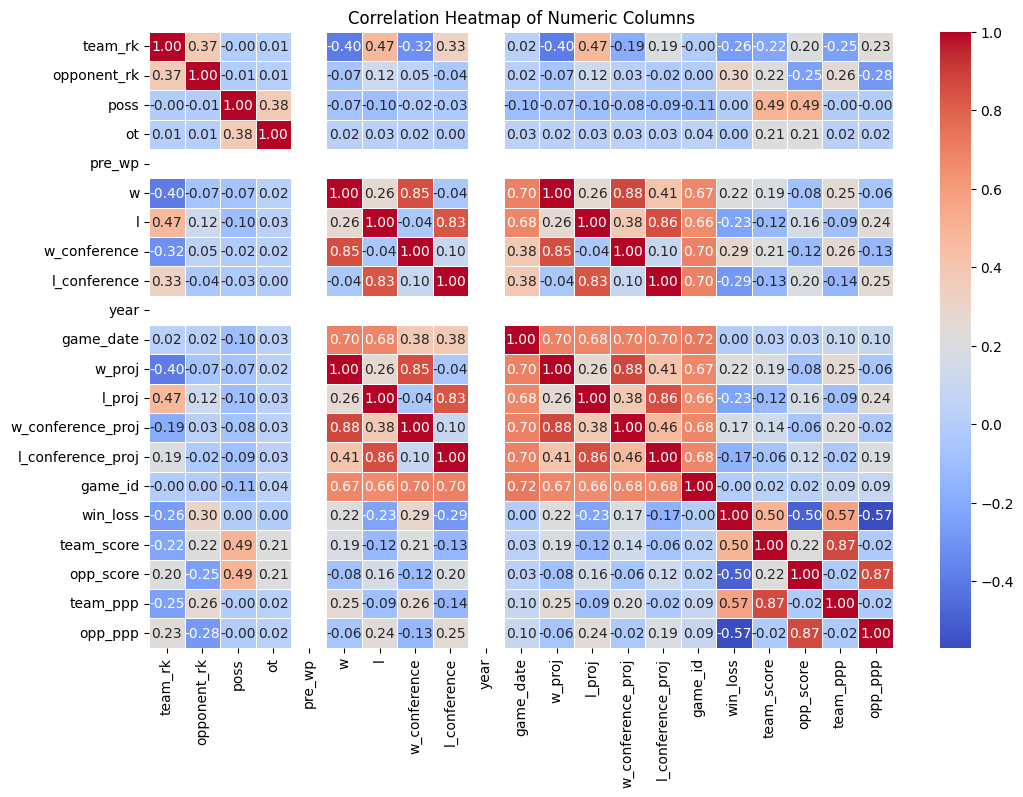

In [62]:
#correlation of numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes('number').corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

**Data exploration summary**
* after exploration dataset we will notice that from records of column (pre_wp) are empty
* there are null values in ( w_conference , l_conference , tiers_of_joy)
* the records in (w_conference , l_conference) are the same records in ( w_conference_proj, l_conference_proj) ,So it is better to delete those items
* there are about 70% records in ( tiers_of_joy) are null ,so it is difficult fill nan and also it will be deleted. 
* dtype of three columns are datetime not int or object
* year is constant (2023)

# Now I am going to handle the data, then continue exploring it (EDA).

In [65]:
# delete collumns
cols=['w_conference' , 'l_conference' , 'tiers_of_joy','pre_wp','year']
for col in cols:
    del df[col]

In [66]:
df.iloc[100]

team_rk                           2
team                      Tennessee
opponent_rk                     222
opponent             South Carolina
result                     W, 85-42
poss                             67
ot                                0
location                       Away
w                                13
l                                 2
conference_game                True
postseason                  Regular
day_date                  Sat Jan 7
game_date                  20230107
w_proj                           13
l_proj                            2
w_conference_proj                 3
l_conference_proj                 0
date                     2023-01-07
game_id                        2899
win_loss                          1
team_score                       85
opp_score                        42
team_ppp                   1.268657
opp_ppp                    0.626866
Name: 100, dtype: object

In [67]:
# change time from int or object into datetime
df['game_date'] = pd.to_datetime(df['game_date'], format='%Y%m%d')
df['date'] = pd.to_datetime(df['date'])

In [68]:
print("True") if df['game_date'].equals(df['date']) else print("False")

True


* After comparing the two columns, we found that they are the same, so delete one of them

In [70]:
del df['date']
del df['day_date']

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   team_rk            10150 non-null  int64         
 1   team               10150 non-null  object        
 2   opponent_rk        10150 non-null  int64         
 3   opponent           10150 non-null  object        
 4   result             10150 non-null  object        
 5   poss               10150 non-null  int64         
 6   ot                 10150 non-null  int64         
 7   location           10150 non-null  object        
 8   w                  10150 non-null  int64         
 9   l                  10150 non-null  int64         
 10  conference_game    10150 non-null  bool          
 11  postseason         10150 non-null  object        
 12  game_date          10150 non-null  datetime64[ns]
 13  w_proj             10150 non-null  int64         
 14  l_proj

In [76]:
# duild calendar
start_date = df['game_date'].min()
end_date = df['game_date'].max()


calendar = pd.DataFrame({"game_date": pd.date_range(start=start_date, end=end_date)})


calendar["year"] = calendar["game_date"].dt.year
calendar["month"] = calendar["game_date"].dt.month
calendar["day"] = calendar["game_date"].dt.day
calendar["weekday"] = calendar["game_date"].dt.weekday  
calendar["week"] = calendar["game_date"].dt.isocalendar().week
calendar["nameOfDay"] = calendar["game_date"].dt.strftime("%a")
calendar["nameOfMonth"] = calendar["game_date"].dt.month_name()


In [81]:
df_analysis= df.merge(calendar, on="game_date", how="right")

df_analysis


team_rk            team  opponent_rk             opponent    result  \
0          7.0         Houston        219.0    Northern Colorado  W, 83-36   
1         11.0            UCLA        224.0       Sacramento St.  W, 76-50   
2         17.0         Alabama        157.0             Longwood  W, 75-54   
3          4.0       Tennessee        294.0       Tennessee Tech  W, 75-43   
4         27.0     Connecticut        332.0            Stonehill  W, 85-54   
...        ...             ...          ...                  ...       ...   
10147    359.0           Lamar        339.0          New Orleans  L, 84-79   
10148    358.0  St. Francis NY        321.0  Fairleigh Dickinson  L, 86-69   
10149    360.0           IUPUI        121.0       Youngstown St.  L, 93-79   
10150    361.0       Green Bay        235.0    Purdue Fort Wayne  L, 78-61   
10151    363.0             LIU        316.0            Merrimack  L, 80-59   

       poss   ot location     w     l  ... opp_score  team_ppp   opp_ppp  \
0      64.0  0.0     Home   1.0   0.0  ...      36.0  1.296875  0.562500   
1      68.0  0.0     Home   1.0   0.0  ...      50.0  1.117647  0.735294   
2      78.0  0.0     Home   1.0   0.0  ...      54.0  0.961538  0.692308   
3      67.0  0.0     Home   1.0   0.0  ...      43.0  1.119403  0.641791   
4      75.0  0.0     Home   1.0   0.0  ...      54.0  1.133333  0.720000   
...     ...  ...      ...   ...   ...  ...       ...       ...       ...   
10147  71.0  0.0     Home   9.0  21.0  ...      84.0  1.112676  1.183099   
10148  66.0  0.0     Away  14.0  15.0  ...      86.0  1.045455  1.303030   
10149  69.0  0.0     Home   5.0  26.0  ...      93.0  1.144928  1.347826   
10150  69.0  0.0     Home   3.0  28.0  ...      78.0  0.884058  1.130435   
10151  77.0  0.0     Home   3.0  25.0  ...      80.0  0.766234  1.038961   

       year  month  day  weekday  week  nameOfDay  nameOfMonth  
0      2022     11    7        0    45        Mon     November  
1      2022     11    7        0    45        Mon     November  
2      2022     11    7        0    45        Mon     November  
3      2022     11    7        0    45        Mon     November  
4      2022     11    7        0    45        Mon     November  
...     ...    ...  ...      ...   ...        ...          ...  
10147  2023      2   25        5     8        Sat     February  
10148  2023      2   25        5     8        Sat     February  
10149  2023      2   25        5     8        Sat     February  
10150  2023      2   25        5     8        Sat     February  
10151  2023      2   25        5     8        Sat     February  

[10152 rows x 30 columns]

In [83]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   team_rk            10150 non-null  float64       
 1   team               10150 non-null  object        
 2   opponent_rk        10150 non-null  float64       
 3   opponent           10150 non-null  object        
 4   result             10150 non-null  object        
 5   poss               10150 non-null  float64       
 6   ot                 10150 non-null  float64       
 7   location           10150 non-null  object        
 8   w                  10150 non-null  float64       
 9   l                  10150 non-null  float64       
 10  conference_game    10150 non-null  object        
 11  postseason         10150 non-null  object        
 12  game_date          10152 non-null  datetime64[ns]
 13  w_proj             10150 non-null  float64       
 14  l_proj

In [85]:
df_analysis.fillna({"team": "No Game", "score": 0}, inplace=True)

# Data Analysis Reporting

In [88]:
df_analysis['team_score']

0        83.0
1        76.0
2        75.0
3        75.0
4        85.0
         ... 
10147    79.0
10148    69.0
10149    79.0
10150    61.0
10151    59.0
Name: team_score, Length: 10152, dtype: float64

## Date Analysis

### Number of Games Per Month

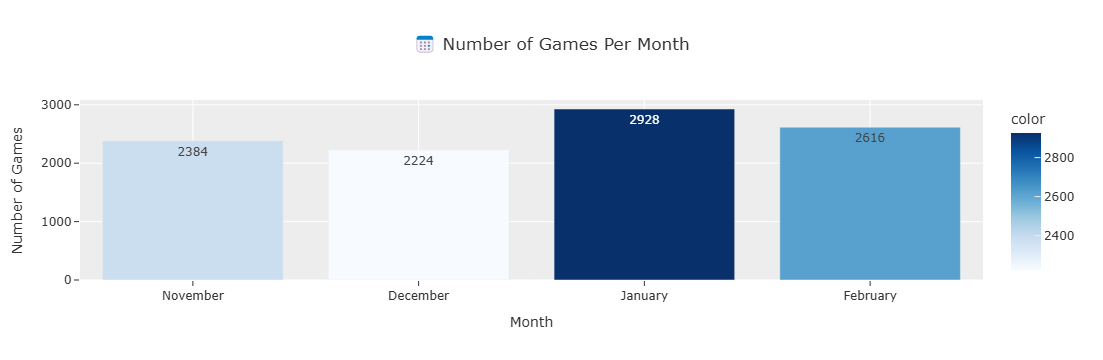

In [92]:
month_count=df_analysis['nameOfMonth'].value_counts().reindex(["November", "December", "January", "February"])
fig = px.bar(x=month_count.index, y=month_count.values, 
             title="📅 Number of Games Per Month",
             labels={"x": "Month", "y": "Number of Games"},
             text_auto=True, color=month_count.values, 
             color_continuous_scale="blues",template="ggplot2")

fig.update_layout(xaxis_title="Month", yaxis_title="Number of Games")

fig.show()

### Number of Games Per Day of the Week

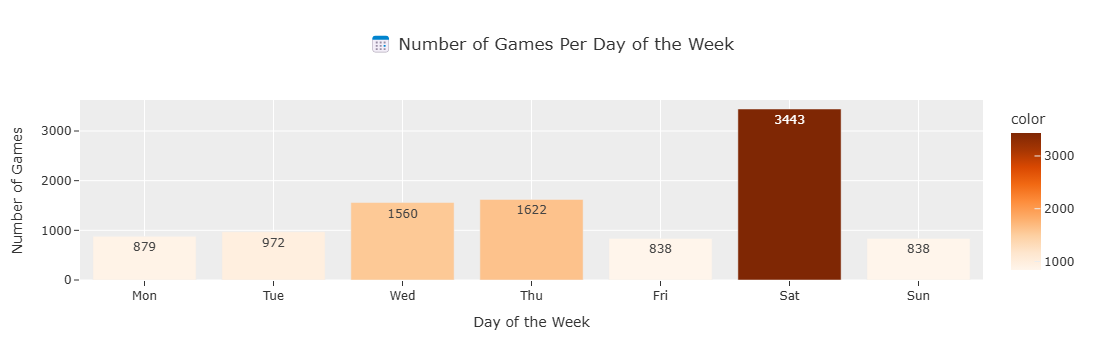

In [94]:
# Count the number of games per day
day_counts = df_analysis["nameOfDay"].value_counts().reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Create bar chart using Plotly
fig = px.bar(x=day_counts.index, y=day_counts.values, 
             title="📅 Number of Games Per Day of the Week",
             labels={"x": "Day of the Week", "y": "Number of Games"},
             text_auto=True, color=day_counts.values, 
             color_continuous_scale="Oranges", template="ggplot2")

fig.update_layout(xaxis_title="Day of the Week", yaxis_title="Number of Games")

fig.show()

### Ranking Teams by Total Wins

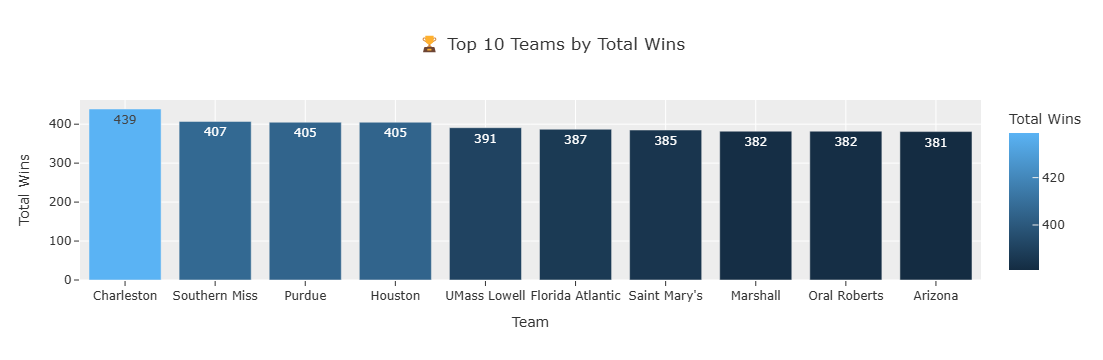

In [96]:
# Calculate total wins for each team
top_teams = df_analysis.groupby("team")["w"].sum().reset_index()

# Sort teams in descending order and select the top 10
top_teams = top_teams.sort_values(by="w", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(top_teams, x="team", y="w", 
             title="🏆 Top 10 Teams by Total Wins",
             labels={"team": "Team", "w": "Total Wins"},
             text_auto=True, color="w", template="ggplot2")

fig.update_layout(xaxis_title="Team", yaxis_title="Total Wins")
fig.show()

### Top 10 Teams by Total Points Scored

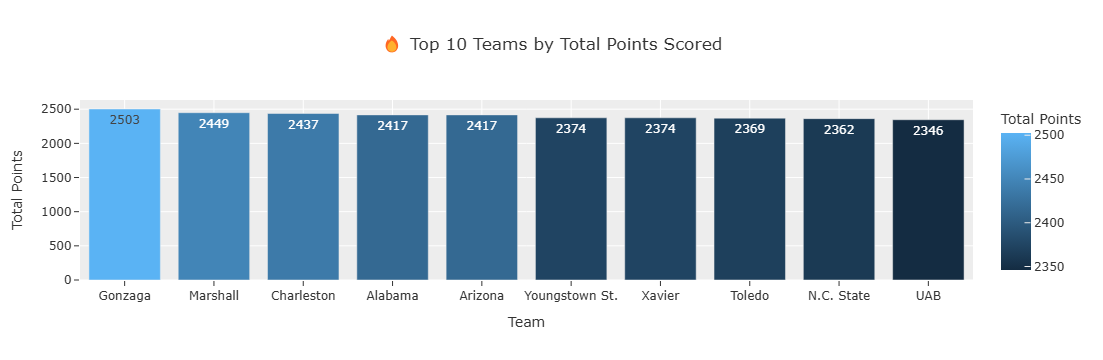

In [97]:
# Calculate the Total points per game for each team
top_teams = df_analysis.groupby("team")["team_score"].sum().reset_index()

# Sort teams in descending order and select the top 10
top_teams = top_teams.sort_values(by="team_score", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(top_teams, x="team", y="team_score", 
             title="🔥 Top 10 Teams by Total Points Scored",
             labels={"team": "Team", "team_score": "Total Points"},
             text_auto=True, color="team_score", template="ggplot2")

fig.update_layout(xaxis_title="Team", yaxis_title="Total Points")
fig.show()


### Top 10 Teams That Have Conceded the Most Points

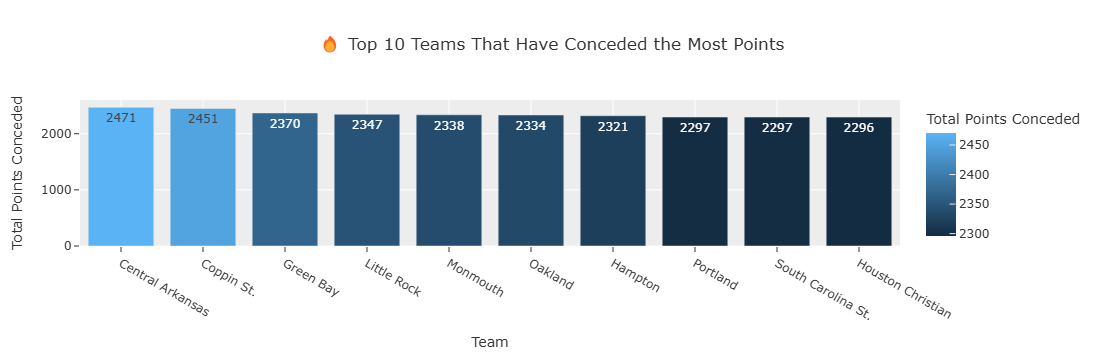

In [98]:
# Calculate the total points conceded per team
bottom_teams = df_analysis.groupby("team")["opp_score"].sum().reset_index()

# Sort teams in descending order to find those that conceded the most points
bottom_teams = bottom_teams.sort_values(by="opp_score", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(bottom_teams, x="team", y="opp_score", 
             title="🔥 Top 10 Teams That Have Conceded the Most Points",
             labels={"team": "Team", "opp_score": "Total Points Conceded"},
             text_auto=True, color="opp_score", template="ggplot2")

fig.update_layout(xaxis_title="Team", yaxis_title="Total Points Conceded")

fig.show()


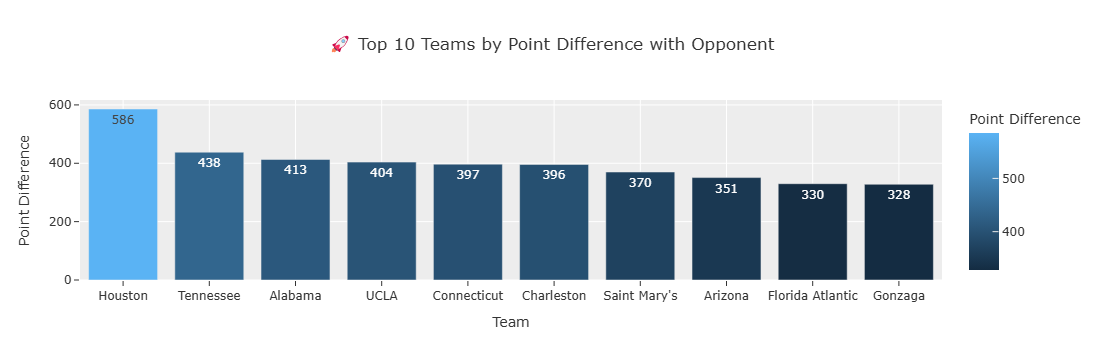

In [99]:
# Calculate point difference (team score - opponent score) for each team
df_analysis["point_diff"] = df_analysis["team_score"] - df_analysis["opp_score"]
top_teams = df_analysis.groupby("team")["point_diff"].sum().reset_index()

# Sort teams in descending order and select the top 10
top_teams = top_teams.sort_values(by="point_diff", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(top_teams, x="team", y="point_diff", 
             title="🚀 Top 10 Teams by Point Difference with Opponent",
             labels={"team": "Team", "point_diff": "Point Difference"},
             text_auto=True, color="point_diff", template="ggplot2")

fig.update_layout(xaxis_title="Team", yaxis_title="Point Difference")
fig.show()


### Top 10 Teams That Have Conceded the Most Points

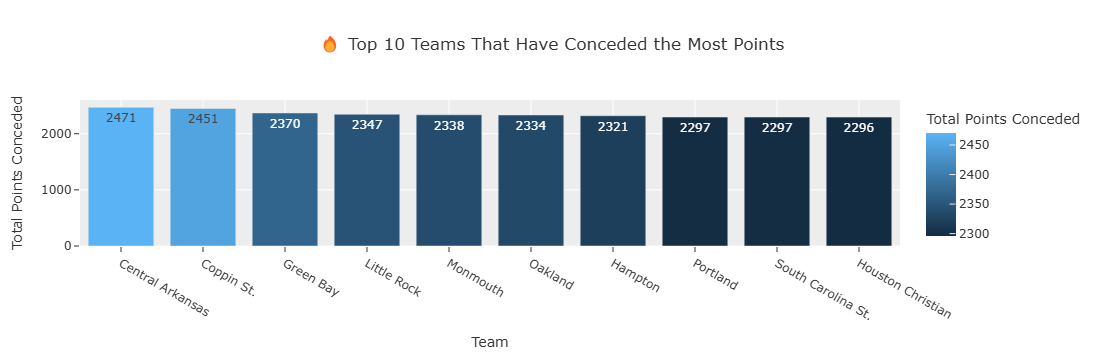

In [102]:
# Calculate the total points conceded per team
bottom_teams = df_analysis.groupby("team")["opp_score"].sum().reset_index()

# Sort teams in descending order to find those that conceded the most points
bottom_teams = bottom_teams.sort_values(by="opp_score", ascending=False).head(10)

# Create an interactive bar chart
fig = px.bar(bottom_teams, x="team", y="opp_score", 
             title="🔥 Top 10 Teams That Have Conceded the Most Points",
             labels={"team": "Team", "opp_score": "Total Points Conceded"},
             text_auto=True, color="opp_score", template="ggplot2")

fig.update_layout(xaxis_title="Team", yaxis_title="Total Points Conceded")

fig.show()

### Top 10 Teams That Have Conceded the Fewest Points

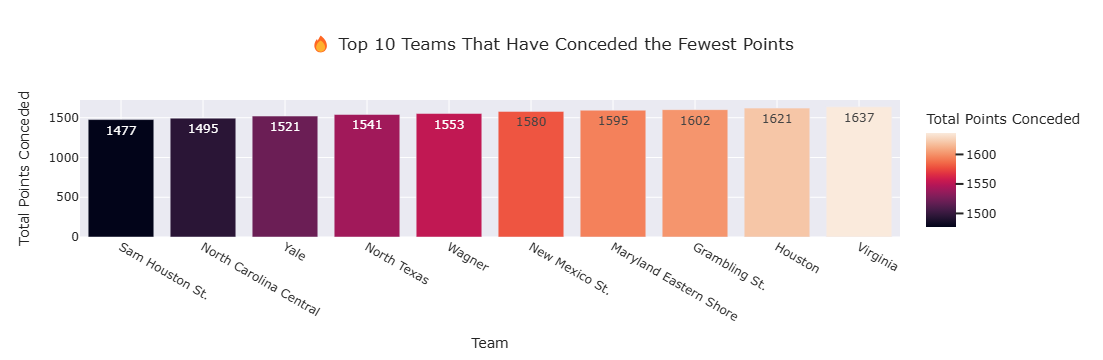

In [103]:
best_defense = df_analysis.groupby("team", as_index=False)["opp_score"].sum()

# Remove "No Game" entries
best_defense = best_defense[best_defense["team"] != "No Game"]

# Sort teams by points conceded in ascending order (best defenses)
best_defense = best_defense.sort_values(by="opp_score", ascending=True).head(10)

# Create an interactive bar chart
fig = px.bar(best_defense, x="team", y="opp_score", 
             title="🔥 Top 10 Teams That Have Conceded the Fewest Points",
             labels={"team": "Team", "opp_score": "Total Points Conceded"},
             text_auto=True, color="opp_score", template="seaborn")

fig.update_layout(xaxis_title="Team", yaxis_title="Total Points Conceded")

fig.show()

### Home vs. Away Wins/Losses Distribution

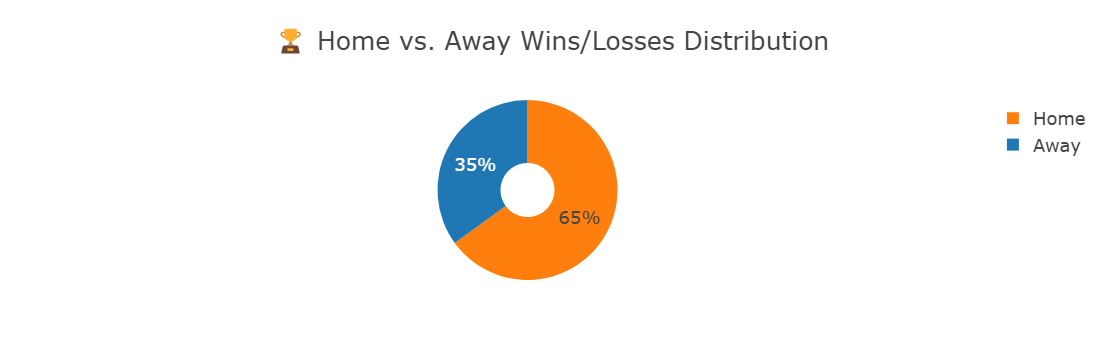

In [104]:
# Count wins and losses for each location (Home/Away)
home_vs_away = df_analysis.groupby(["location", "win_loss"]).size().reset_index(name="count")

home_vs_away = home_vs_away[(home_vs_away["win_loss"] != 0) & (home_vs_away["location"].isin(["Away", "Home"]))]

fig = px.pie(
    home_vs_away, 
    values="count", 
    names="location",  # Category labels
    color="location",  # Color by win/loss
    title="🏆 Home vs. Away Wins/Losses Distribution",
    hole=0.3,  # Donut chart effect (optional)
    template="presentation"  
)

# Show the chart
fig.show()

## Machine Learning

In [113]:
# feature engineering
df['rk_diff'] = df['team_rk'] - df['opponent_rk']
df['eff_margin'] = df['team_ppp'] - df['opp_ppp']

In [116]:
df['is_home']=df['location'].apply(lambda x: 1 if x=="Home" else 0)
df['conference_game']=df['conference_game'].astype(int)

In [413]:
df['day_of_week'] = df['game_date'].dt.dayofweek  
df['month'] = df['game_date'].dt.month 
df['year']=df['game_date'].dt.year
df['days_since_last_game'] = df.groupby('team')['game_date'].diff().dt.days 
df['days_since_last_game'] = df['days_since_last_game'].fillna(0)

In [445]:

df = df.sort_values(by=['team', 'game_date'])

df['team_goals_before_match'] = (
    df.groupby(['team', df['game_date'].dt.year])['team_score']
    .cumsum()
    .shift(1)
)
df['team_goals_before_match'] = df['team_goals_before_match'].fillna(0)


df = df.sort_values(by=['opponent', 'game_date'])


df['opp_goals_before_match'] = (
    df.groupby(['opponent', df['game_date'].dt.year])['opp_score']
    .cumsum()
    .shift(1)
)
df['opp_goals_before_match'] = df['opp_goals_before_match'].fillna(0)


In [452]:
df_ml=df.copy()

In [454]:
df_ml.dtypes

team_rk                             int64
team                               object
opponent_rk                         int64
opponent                           object
result                             object
poss                                int64
ot                                  int64
location                           object
w                                   int64
l                                   int64
conference_game                     int32
postseason                         object
game_date                  datetime64[ns]
w_proj                              int64
l_proj                              int64
w_conference_proj                   int64
l_conference_proj                   int64
game_id                             int64
win_loss                            int64
team_score                          int64
opp_score                           int64
team_ppp                          float64
opp_ppp                           float64
rk_diff                           

In [456]:
df_numeric = df.select_dtypes(include=['number'])

In [458]:
df_numeric

team_rk  opponent_rk  poss  ot   w   l  conference_game  w_proj  \
8586       319          183    75   0   0   1                0       0   
693         41          183    69   0   2   0                0       2   
5055       193          183    76   0   4   1                0       4   
5648       258          183    72   0   2   3                0       2   
3800       187          183    69   0   5   2                0       5   
...        ...          ...   ...  ..  ..  ..              ...     ...   
5261       202          121    72   0  16  11                1      16   
6514       221          121    72   0  18   9                1      18   
10096      361          121    73   0   3  26                1       3   
6433       234          121    67   0  15  15                1      15   
10067      360          121    69   0   5  26                1       5   

       l_proj  w_conference_proj  ...   opp_ppp  rk_diff  eff_margin  is_home  \
8586        1                  0  ...  0.866667      136   -0.120000        0   
693         0                  0  ...  0.840580     -142    0.275362        1   
5055        1                  0  ...  0.802632       10    0.210526        0   
5648        3                  0  ...  0.930556       75    0.138889        0   
3800        2                  0  ...  0.942029        4    0.159420        0   
...       ...                ...  ...       ...      ...         ...      ...   
5261       11                 11  ...  1.083333       81    0.041667        1   
6514        9                 12  ...  1.208333      100   -0.402778        0   
10096      26                  2  ...  1.301370      240   -0.410959        0   
6433       15                 10  ...  0.955224      113    0.283582        1   
10067      26                  2  ...  1.347826      239   -0.202899        1   

       opp_goals_before_match  team_goals_before_match  day_of_week  month  \
8586                      0.0                   1055.0            0     11   
693                      65.0                     87.0            4     11   
5055                    123.0                    250.0            0     11   
5648                    184.0                    169.0            1     11   
3800                    251.0                    340.0            2     11   
...                       ...                      ...          ...    ...   
5261                    909.0                    818.0            6      2   
6514                    987.0                    947.0            3      2   
10096                  1074.0                    777.0            5      2   
6433                   1169.0                    963.0            1      2   
10067                  1233.0                   1107.0            5      2   

       days_since_last_game  year  
8586                    0.0  2022  
693                     4.0  2022  
5055                    6.0  2022  
5648                    1.0  2022  
3800                    1.0  2022  
...                     ...   ...  
5261                    2.0  2023  
6514                    5.0  2023  
10096                   2.0  2023  
6433                    3.0  2023  
10067                   2.0  2023  

[10150 rows x 26 columns]

In [460]:
df_numeric.columns

Index(['team_rk', 'opponent_rk', 'poss', 'ot', 'w', 'l', 'conference_game',
       'w_proj', 'l_proj', 'w_conference_proj', 'l_conference_proj', 'game_id',
       'win_loss', 'team_score', 'opp_score', 'team_ppp', 'opp_ppp', 'rk_diff',
       'eff_margin', 'is_home', 'opp_goals_before_match',
       'team_goals_before_match', 'day_of_week', 'month',
       'days_since_last_game', 'year'],
      dtype='object')

In [462]:
del df_numeric['game_id']

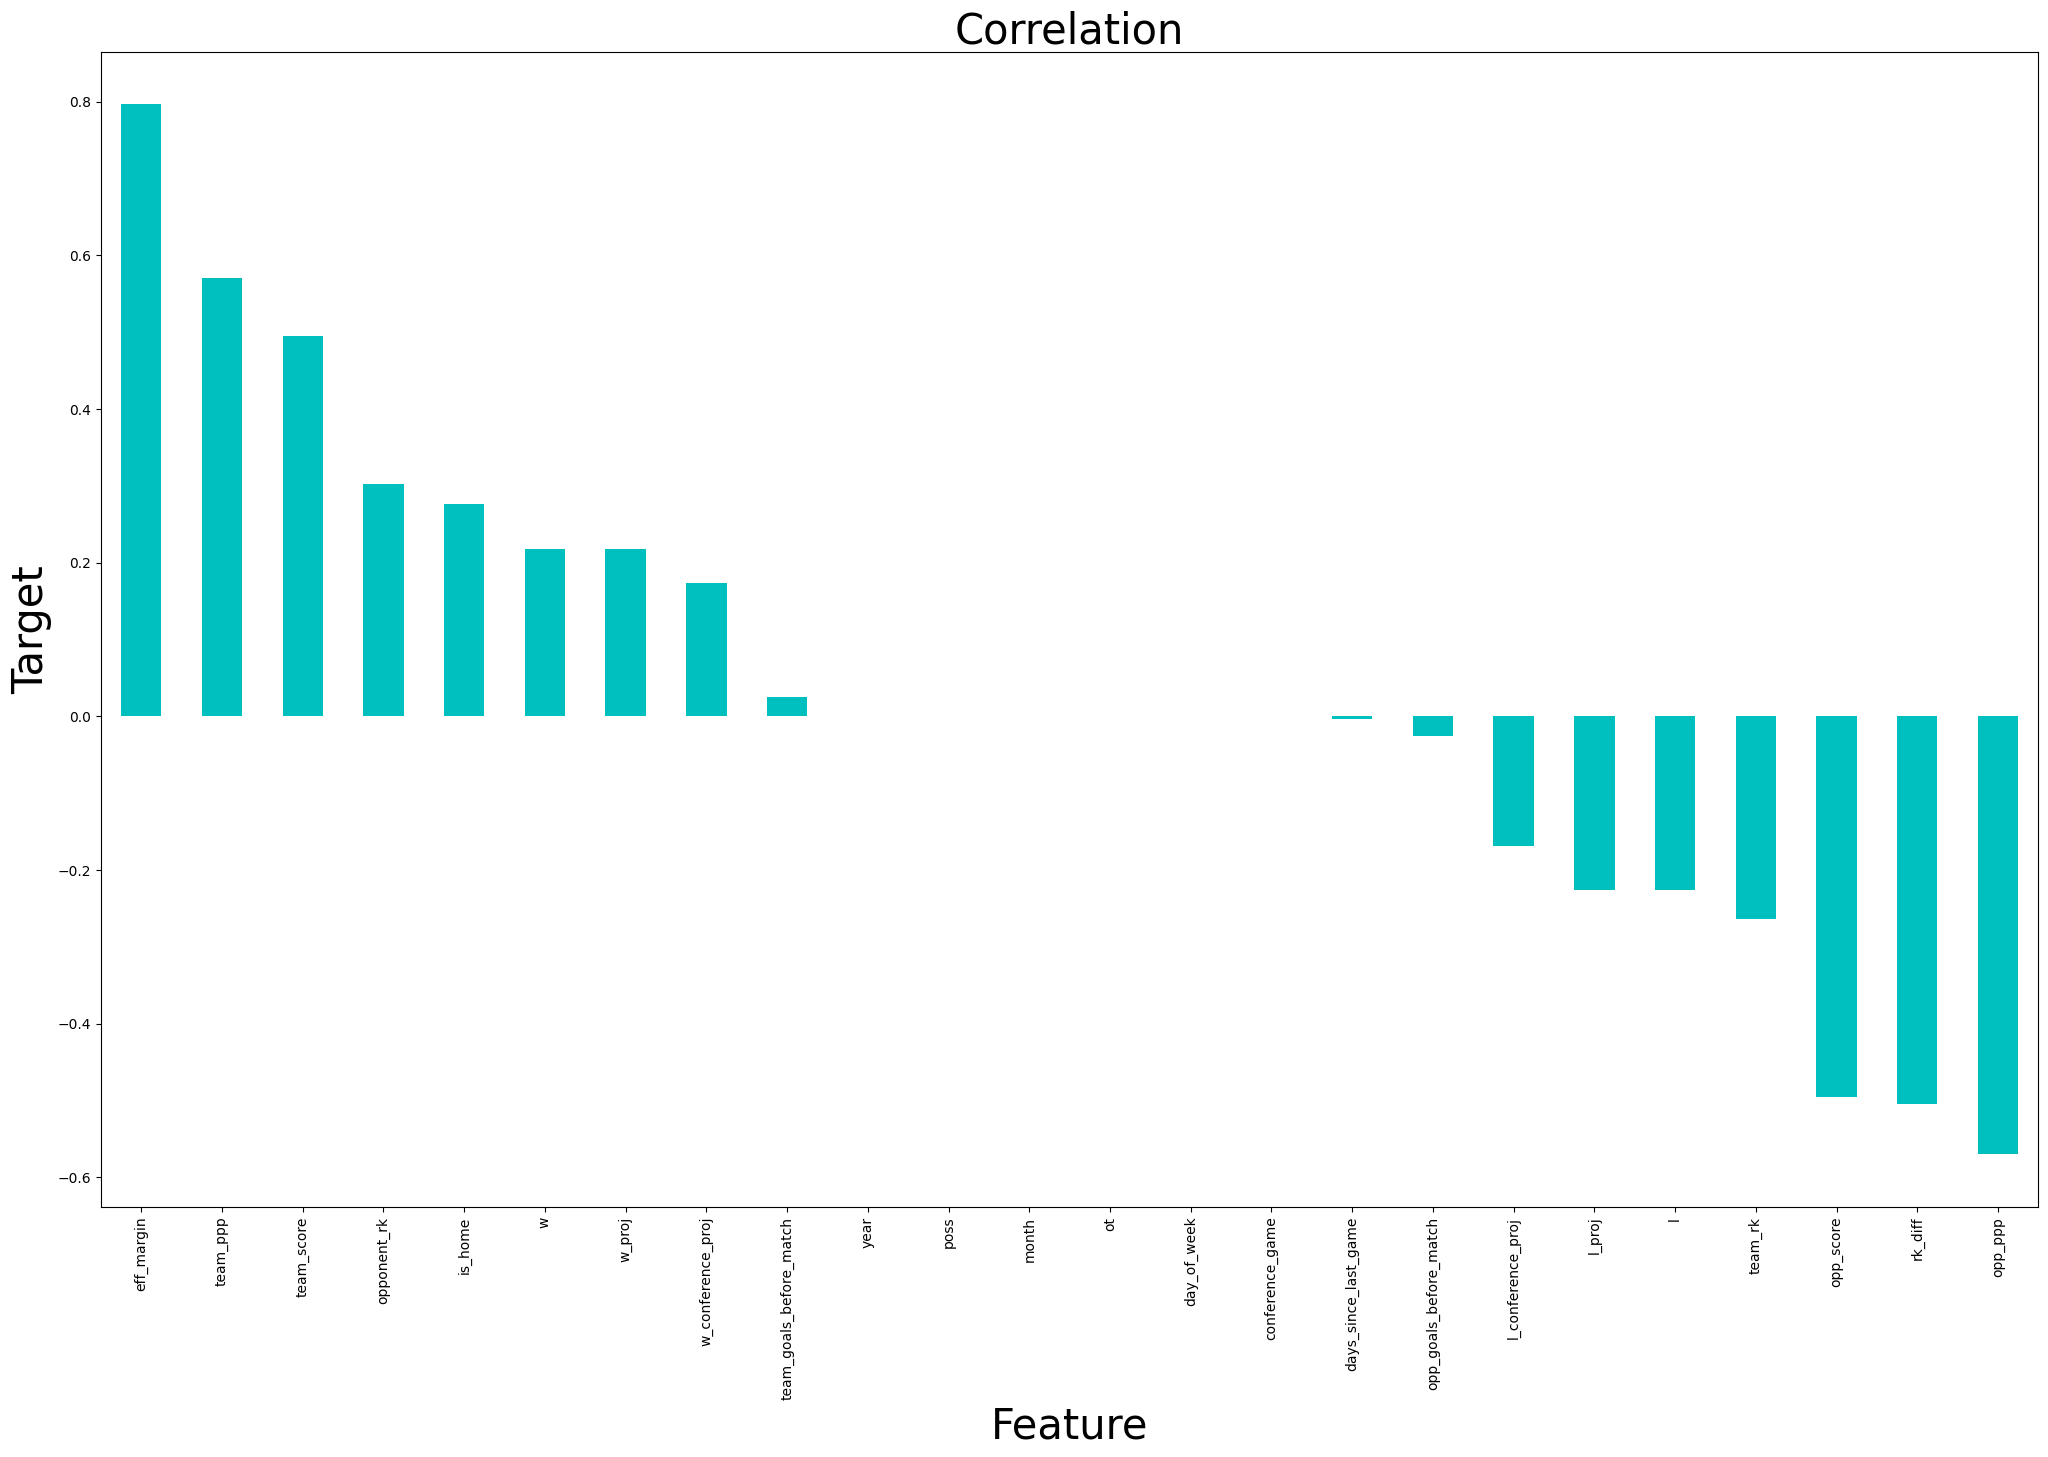

In [464]:
plt.figure(figsize = (25, 15))

df_numeric.corr()['win_loss'].sort_values(ascending = False).drop(['win_loss']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 30)

plt.ylabel('Target', fontsize = 30)

plt.title('Correlation', fontsize = 30)

plt.show()

### vif

In [465]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make sure there's no missing data
X = df_numeric

# Add a constant (for intercept)
from statsmodels.tools.tools import add_constant
X = add_constant(X)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif


feature           VIF
0                     const  8.157786e+09
1                   team_rk           inf
2               opponent_rk           inf
3                      poss  1.019664e+02
4                        ot  1.186216e+00
5                         w           inf
6                         l           inf
7           conference_game  4.612286e+00
8                    w_proj           inf
9                    l_proj           inf
10        w_conference_proj  5.551620e+00
11        l_conference_proj  5.344407e+00
12                 win_loss  2.847782e+00
13               team_score  2.054092e+02
14                opp_score  2.059369e+02
15                 team_ppp           inf
16                  opp_ppp           inf
17                  rk_diff           inf
18               eff_margin           inf
19                  is_home  1.157833e+00
20   opp_goals_before_match  3.630353e+00
21  team_goals_before_match  3.750794e+00
22              day_of_week  1.092657e+00
23                    month  3.942191e+02
24     days_since_last_game  1.200380e+00
25                     year  4.941027e+02

In [774]:
features = [
    'team_rk', 'opponent_rk',
    'is_home', 
    'w_proj', 'l_proj', 'w_conference_proj', 'l_conference_proj',
    'team_goals_before_match','opp_goals_before_match','days_since_last_game','day_of_week', 'month','year',
    "win_loss"
]


In [776]:
# Make sure there's no missing data
X = df_ml[features]

# Add a constant (for intercept)
from statsmodels.tools.tools import add_constant
X = add_constant(X)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif[vif["feature"] != "const"]
vif

feature         VIF
1                   team_rk    2.763244
2               opponent_rk    1.512006
3                   is_home    1.115628
4                    w_proj   11.335560
5                    l_proj   11.467409
6         w_conference_proj    5.424803
7         l_conference_proj    5.297216
8   team_goals_before_match    3.734634
9    opp_goals_before_match    3.617237
10     days_since_last_game    1.181789
11              day_of_week    1.086673
12                    month  393.433106
13                     year  493.130300
14                 win_loss    1.487235

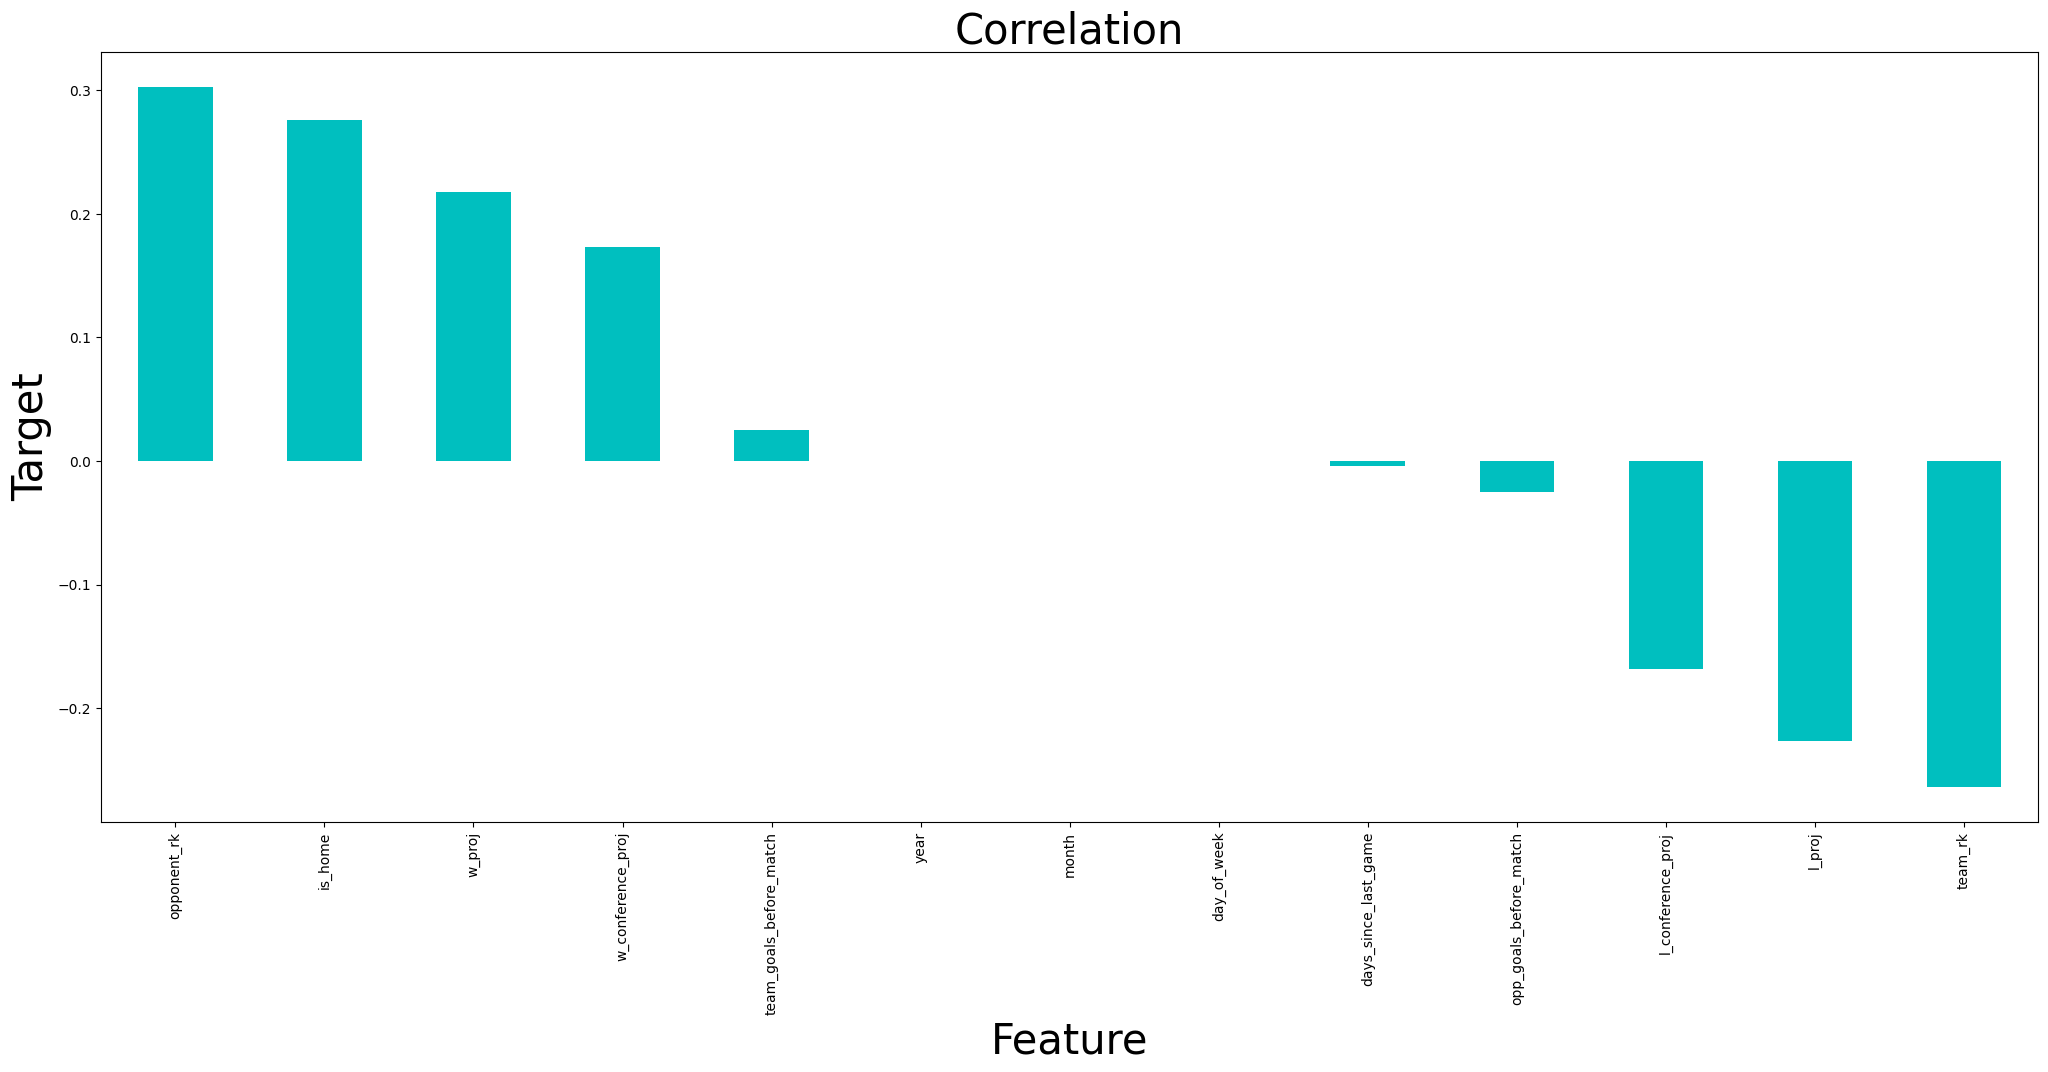

In [778]:
plt.figure(figsize = (25, 10))

df_ml[features].corr()['win_loss'].sort_values(ascending = False).drop(['win_loss']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 30)

plt.ylabel('Target', fontsize = 30)

plt.title('Correlation', fontsize = 30)

plt.show()

In [780]:
df_numeric[features].loc[
    (df_numeric['team_rk'] < df_numeric['opponent_rk']) &
    (df_numeric['win_loss'] == 0)
]


team_rk  opponent_rk  is_home  w_proj  l_proj  w_conference_proj  \
3734      115          183        1      16       7                  7   
4242      143          183        1      13      11                  5   
3027      104          146        1       9       9                  1   
1367       47          146        0      19       6                  6   
4833       95          106        0       3       1                  0   
...       ...          ...      ...     ...     ...                ...   
4212      162          166        0       7      14                  3   
1368       52          166        1      19       7                  6   
129         2           17        0      14       1                  3   
337        11           17        0      14       5                  6   
136         6           17        1      16       6                  5   

      l_conference_proj  team_goals_before_match  opp_goals_before_match  \
3734                  3                    549.0                   513.0   
4242                  6                    568.0                   596.0   
3027                  4                    148.0                    65.0   
1367                  6                    784.0                   625.0   
4833                  0                     66.0                   200.0   
...                 ...                      ...                     ...   
4212                  7                    422.0                   410.0   
1368                  7                    861.0                   681.0   
129                   1                   1161.0                  1174.0   
337                   2                    273.0                   178.0   
136                   6                    432.0                   425.0   

      days_since_last_game  day_of_week  month  year  win_loss  
3734                   4.0            2      2  2023         0  
4242                   3.0            5      2  2023         0  
3027                   3.0            1      1  2023         0  
1367                   3.0            4      2  2023         0  
4833                  11.0            0     11  2022         0  
...                    ...          ...    ...   ...       ...  
4212                   3.0            1      1  2023         0  
1368                   4.0            1      2  2023         0  
129                    3.0            5     12  2022         0  
337                    4.0            6      1  2023         0  
136                    3.0            2      1  2023         0  

[1420 rows x 14 columns]

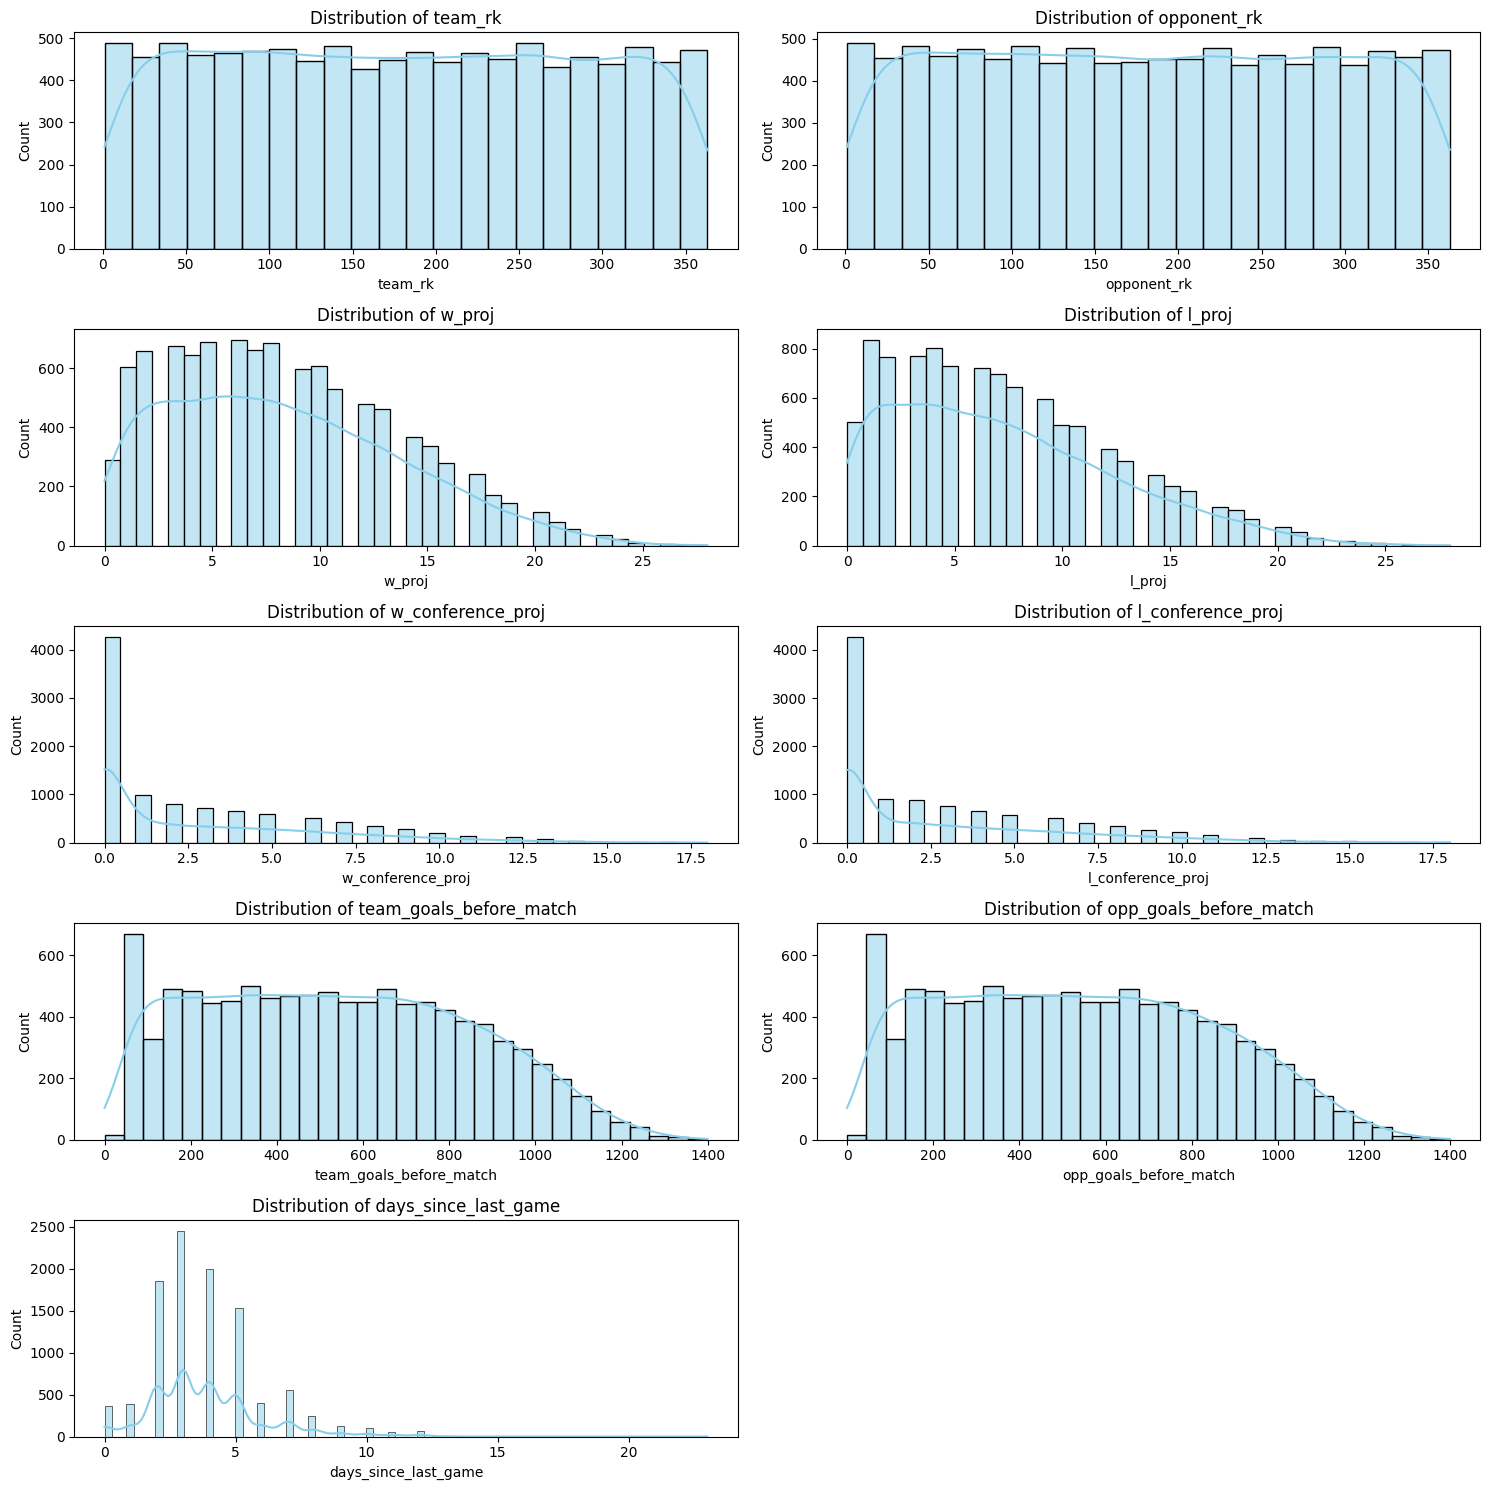

In [717]:
numeric_features = [
    'team_rk', 'opponent_rk', 'w_proj', 'l_proj',
    'w_conference_proj', 'l_conference_proj',
    'team_goals_before_match', 'opp_goals_before_match',
    'days_since_last_game'
]

plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[col], kde=True ,color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [782]:
final_ml=df_numeric[features]

In [784]:
x=final_ml.iloc[:,:-1]
y = final_ml['win_loss']

In [786]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=42)


In [788]:
models=[]
models.append(('LR' , LogisticRegression()))
models.append(('GB' , GaussianNB()))
models.append(('DT' , DecisionTreeClassifier()))
models.append(('RF' , RandomForestClassifier()))
models.append(('GC' , GradientBoostingClassifier()))
models.append(('SVC' ,SVC()))
models.append(('XGB' , XGBClassifier()))
models.append(('Ada' , AdaBoostClassifier()))
models.append(('voting', VotingClassifier(estimators=[('Ada' , AdaBoostClassifier()), 
                                                      ('SVC' ,SVC()), ('GC',GradientBoostingClassifier())],voting='hard')))

In [790]:
for name , model  in models:
    pipeline=Pipeline([('scaler', StandardScaler()), (name, model)])
    pipeline.fit(x_train,y_train)
    y_pred = pipeline.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    y_train_pred = pipeline.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Model: {name}")
    print("train_accuracy",train_accuracy)
    print("accuracy_test",accuracy_test)
    print("---"*30)

Model: LR
train_accuracy 0.7559723593287265
accuracy_test 0.7
------------------------------------------------------------------------------------------
Model: GB
train_accuracy 0.7315893385982231
accuracy_test 0.65
------------------------------------------------------------------------------------------
Model: DT
train_accuracy 1.0
accuracy_test 0.7
------------------------------------------------------------------------------------------
Model: RF
train_accuracy 1.0
accuracy_test 0.75
------------------------------------------------------------------------------------------
Model: GC
train_accuracy 0.8051332675222113
accuracy_test 0.8
------------------------------------------------------------------------------------------
Model: SVC
train_accuracy 0.7931885488647581
accuracy_test 0.75
------------------------------------------------------------------------------------------
Model: XGB
train_accuracy 0.9201382033563672
accuracy_test 0.8
---------------------------------------------

In [791]:
name = 'voting'
model = VotingClassifier(estimators=[('Ada', AdaBoostClassifier()), 
                                     ('SVC', SVC()), 
                                     ('GC', GradientBoostingClassifier())], 
                         voting='hard')


pipeline = Pipeline([('scaler', StandardScaler()), 
                     (name, model)])


kf = KFold(n_splits=5)  


Model = cross_validate(estimator=pipeline, X=x, y=y, return_train_score=True, 
                       scoring='accuracy', cv=kf, n_jobs=-1)


print('Train Accuracy:', Model['train_score'].mean())
print('Test Accuracy:', Model['test_score'].mean())

Train Accuracy: 0.8049753694581281
Test Accuracy: 0.7904433497536946


In [824]:
from scipy.stats import randint
param_dist = {
    'voting__Ada__n_estimators': randint(50, 150),
    'voting__GC__n_estimators': randint(50, 150),
    'voting__SVC__C': [0.1, 1, 10],
    'voting__SVC__kernel': ['linear', 'rbf'],
    'voting__GC__learning_rate': [0.01, 0.1, 0.2],
    'voting__SVC__gamma': ['scale', 'auto']
}
# Cross-validation split
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',
    cv=kf,
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
    verbose=1
)

# Fit
random_search.fit(x, y)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# report
y_pred = random_search.predict(x)
print("\nClassification Report:\n", classification_report(y, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'voting__Ada__n_estimators': 70, 'voting__GC__learning_rate': 0.2, 'voting__GC__n_estimators': 132, 'voting__SVC__C': 10, 'voting__SVC__gamma': 'scale', 'voting__SVC__kernel': 'linear'}
Best Accuracy Score: 0.7918226600985221

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      5075
           1       0.81      0.80      0.81      5075

    accuracy                           0.81     10150
   macro avg       0.81      0.81      0.81     10150
weighted avg       0.81      0.81      0.81     10150



In [826]:
mean_train_score=random_search.cv_results_['mean_train_score'][random_search.best_index_]
mean_test_score=random_search.cv_results_['mean_test_score'][random_search.best_index_]
print('train score : ',mean_train_score)
print('test score : ',mean_test_score)

train score :  0.8100246305418718
test score :  0.7918226600985221


In [828]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(x)

acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Classification Report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8060098522167488
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      5075
           1       0.81      0.80      0.81      5075

    accuracy                           0.81     10150
   macro avg       0.81      0.81      0.81     10150
weighted avg       0.81      0.81      0.81     10150



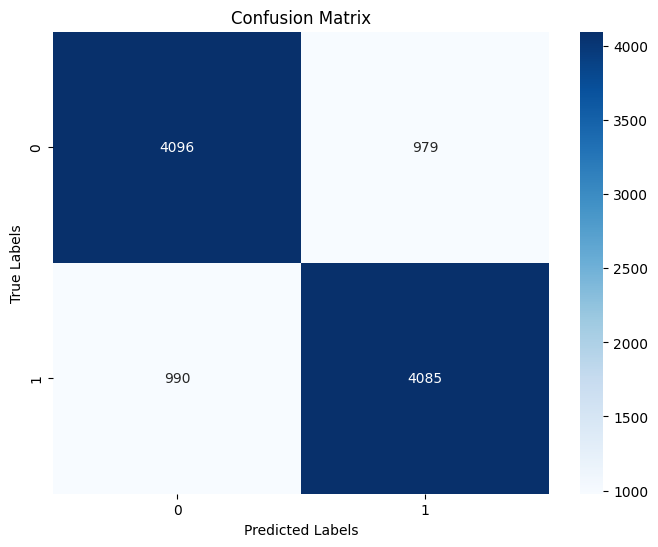

In [830]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [844]:
import joblib
joblib.dump(best_model, 'voting_classifier_model.pkl')
joblib.dump(x.columns,'columns_used_for_predic.pkl')

['columns_used_for_predic.pkl']

In [930]:
model=joblib.load('voting_classifier_model.pkl')
features=joblib.load('columns_used_for_predic.pkl')


# Ex
x_new = pd.DataFrame([[
    319.0,     # team_rk
    183.0,     # opponent_rk
    0,      # is_home
    0,     # w_proj
    1,     # l_proj
    0,     # w_conference_proj
    0,      # l_conference_proj
    1055.0,   # team_goals_before_match
    18,   # opp_goals_before_match
    0 ,   # days_since_last_game
    3,      # day_of_week 
    11,     # month 
    2023    # Year
        
]], columns=features)


In [932]:
result = model.predict(x_new)
print("Prediction for new record:","lose" if result[0]==0 else "win" )

Prediction for new record: lose
